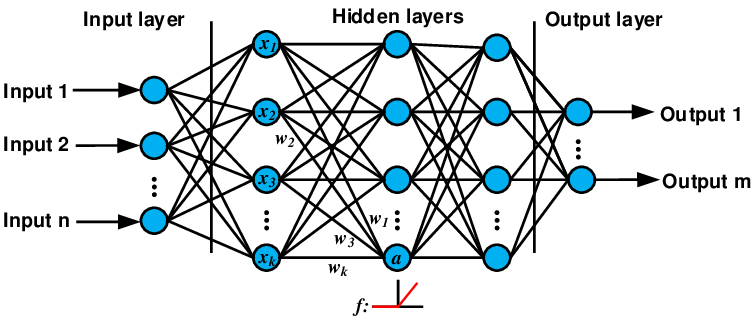

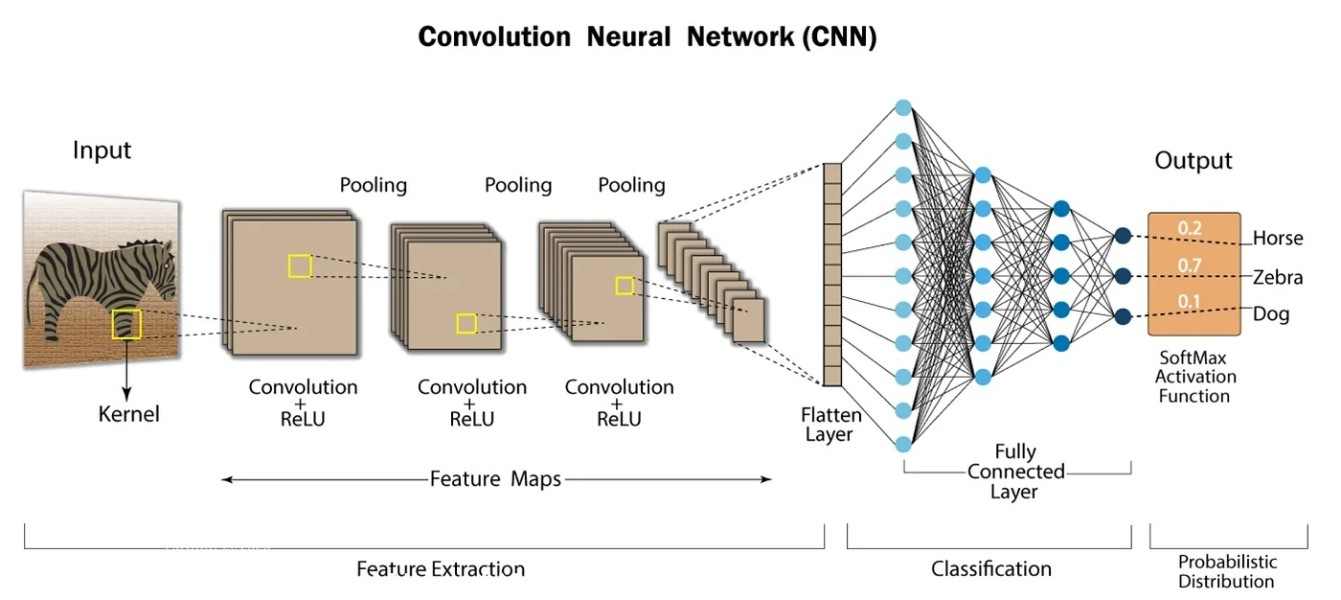

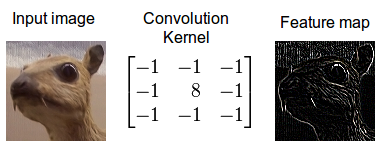

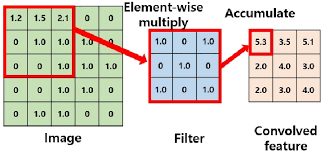

**<h2 align="left"><font color=#8502d1>CIFAR-10 Dataset</font></h2>**

The __CIFAR-10__ dataset is a well-established benchmark in the field of machine learning, specifically designed for __image classification__. Comprising __60,000 color images__, each of __size 32x32 pixels__, the dataset is segmented into __10 distinct classes__, each representing a different object or creature. The classes encompass the following :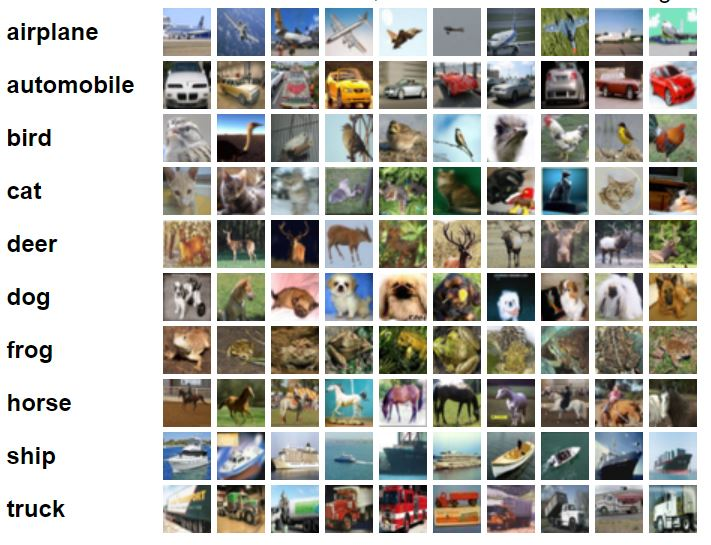



Each class contains an equal distribution, boasting 6,000 images. From the total image count, 50,000 are designated for training while the remaining 10,000 are set aside for testing.

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:125%; text-align:left">

<h2 align="left"><font color=#8502d1>Objectives</font></h2>
    
* __Data Insights and Exploration__
   - Familiarize with the CIFAR-10 dataset.
   - Visually inspect sample images from various classes to understand data distribution.

    
* __Comprehensive Data Preprocessing__
   - Normalize pixel values of the images to enhance model training efficiency.
   - Convert image labels into a one-hot encoded format suitable for classification tasks.
   - Implement data augmentation techniques to increase the dataset's variability and improve model generalization.

    
* __Architectural Design using Keras__
   - Design a Convolutional Neural Network (CNN) tailored for the CIFAR-10 dataset using the __Keras__ framework.
   - Incorporate mechanisms such as dropouts and regularizations to counteract overfitting.

    
* __Model Training Process__
   - Train the CNN using the prepared dataset.
   - Utilize callbacks to adjust the learning rate dynamically and halt the training early if no improvements are detected, restoring the best model weights from the training.

    
* __Learning Analysis__
   - Visualize the model's learning curves, observing both training and validation performance metrics over epochs.

    
* __Model Evaluation__
   - Assess the trained model's accuracy and loss on the unseen test data to determine its robustness.

    
* __Real-world Generalization Check__
   - Evaluate the model's predictive capability using an image not part of the CIFAR-10 dataset to gauge its real-world applicability.




















In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

**Load the dataset**

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 10000 test images

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

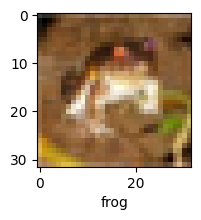

In [ ]:
plot_sample(X_train, y_train, 0)

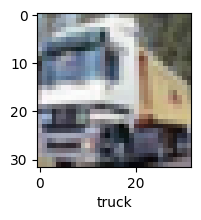

In [ ]:
plot_sample(X_train, y_train, 1)

**Normalizing the training data**

Normalize the images to a range between 0 and 1. Each image has 3 channels (R, G, B), and each channel's value can range from 0 to 255. Therefore, to normalize within the 0 to 1 range, we need to divide by 255.

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

**Build simple artificial neural network for image classification**

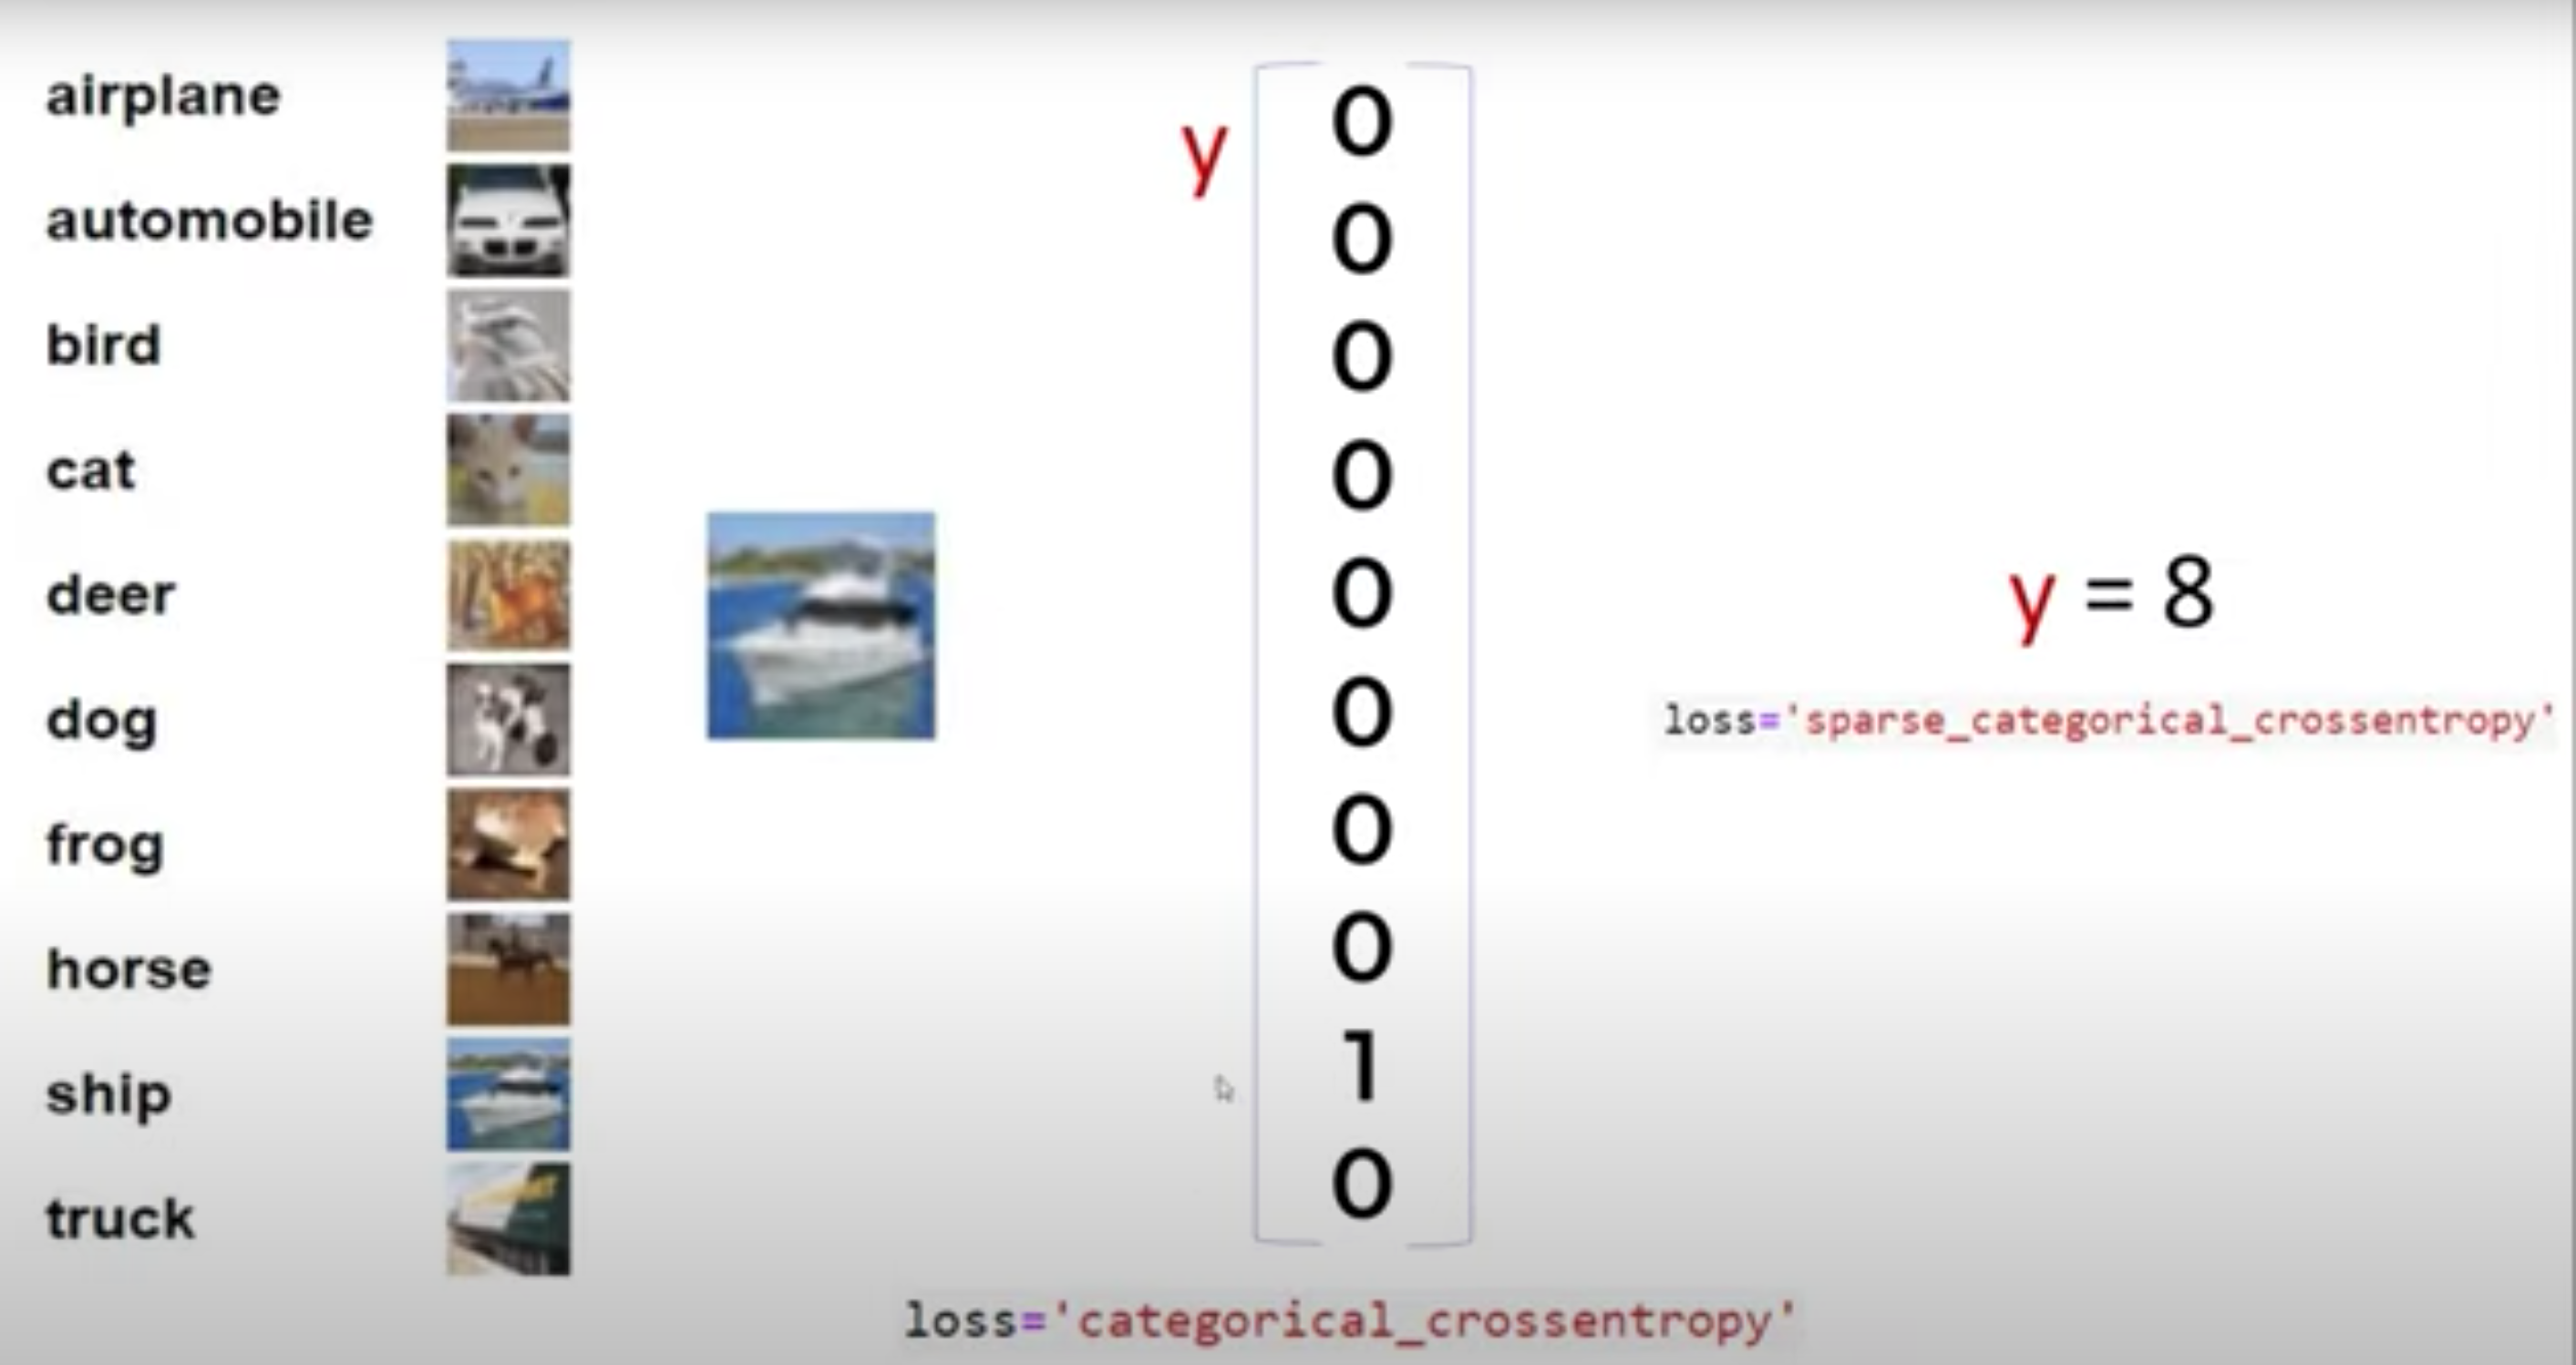


**categorical_crossentropy**: This loss function is used when target labels are one-hot encoded. In this format, each class is represented by a vector where the target class index is 1, and all other indices are 0. For example, if there are three classes (0, 1, 2) and the actual label is 1, the one-hot encoded representation would be [0, 1, 0].

**sparse_categorical_crossentropy**: This function is used when target labels are represented as integer values (with the integer representing the class index). For example, for three classes (0, 1, 2), if the target class is 1, the label would simply be 1 instead of [0, 1, 0]. This approach is more memory efficient, especially when there are many classes.

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'), #(Rectified Linear Unit) is used to introduce non-linearity, the network learn complex patterns.
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')#the output sums to 1.0 and indicates the model’s confidence in each class.
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 93ms/step - accuracy: 0.3022 - loss: 1.9367
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 198s 90ms/step - accuracy: 0.4225 - loss: 1.6394
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 91ms/step - accuracy: 0.4529 - loss: 1.5495
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 182s 79ms/step - accuracy: 0.4770 - loss: 1.4827
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.4907 - loss: 1.4397


You can see that at the end of 5 epochs, accuracy is at around 49%


---



In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.49      0.54      1000
           1       0.53      0.62      0.57      1000
           2       0.42      0.31      0.35      1000
           3       0.32      0.33      0.32      1000
           4       0.43      0.38      0.40      1000
           5       0.39      0.40      0.40      1000
           6       0.57      0.45      0.50      1000
           7       0.71      0.35      0.47      1000
           8       0.56      0.66      0.61      1000
           9       0.38      0.72      0.50      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.47     10000
weighted avg       0.49      0.47      0.47     10000



The model's performance varies significantly across different classes. For example, class "7" has the highest precision (0.71), but a relatively low recall (0.35), while class "9" has low precision (0.38) but a relatively high recall (0.72).



---


**Now let us build a convolutional neural network to train our images**

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - accuracy: 0.3897 - loss: 1.6739
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.6090 - loss: 1.1215
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.6639 - loss: 0.9682
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.6973 - loss: 0.8683
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7259 - loss: 0.7940
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.7402 - loss: 0.7513
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.7620 - loss: 0.6813
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.7827 - loss: 0.6227
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.7945 - loss: 0.5887
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.8131 - loss: 0.5354


With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features


In [ ]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7135 - loss: 0.8808


[0.893937885761261, 0.7117999792098999]

the **predicted probabilities** for different classes for each input image in your dataset.

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


array([[2.0332375e-04, 7.0843578e-07, 4.4387800e-04, 7.7413523e-01,
        1.5091420e-04, 2.0415089e-01, 1.6121704e-02, 1.7130184e-04,
        4.6142703e-03, 7.7746117e-06],
       [1.9117385e-02, 2.0387718e-02, 4.4210497e-06, 3.8633573e-07,
        1.2820919e-09, 1.1866828e-08, 6.7251456e-08, 6.1745958e-10,
        9.6047211e-01, 1.7839733e-05],
       [4.6816650e-01, 3.1155404e-01, 1.2605253e-03, 1.9524796e-03,
        2.4734777e-03, 7.9692918e-04, 8.8800117e-04, 2.4269609e-04,
        5.5189829e-02, 1.5747547e-01],
       [9.9160999e-01, 9.8864490e-05, 3.7073533e-04, 7.0861186e-04,
        3.5439512e-05, 5.4853786e-05, 1.5362223e-04, 7.3679366e-05,
        5.7957238e-03, 1.0984294e-03],
       [6.2108455e-07, 2.1476078e-06, 2.0954657e-02, 1.0848030e-02,
        2.4996628e-01, 4.9714119e-05, 7.1816796e-01, 3.7069842e-06,
        6.5791983e-06, 2.4315159e-07]], dtype=float32)

For example, the first row [2.0332375e-04, 7.0843578e-07,, ..., 7.7413523e-01] represents the model’s predicted probabilities for each class for the first test image. Each value here corresponds to a specific class (from class 0 to class 9).
In this case, 7.7413523e-01 is the highest probability, meaning the model predicts that the first image most likely belongs to the class associated with that probability.\

**Converting Probabilities to Class Labels**

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 0, 6]

Since y_pred contains probabilities, this line uses np.argmax to convert each probability array into a single class label. np.argmax returns the index of the highest probability, which corresponds to the predicted class.

**Comparing Predicted and Actual Classes**

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

**Visualizing an Image and Its True Label**

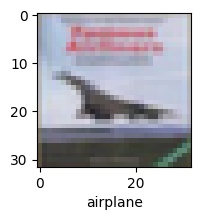

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'

So as we see here the prediction matches the true label